Ex 4.17 - Linear and Quadratic Discriminative Analysis on Height / Weight Data
--------------------------------------------------------------------

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as sps

In [15]:
data = np.loadtxt('heightWeightData.txt', delimiter=',', dtype = int)
data_m = data[data[:,0] == 1]
data_m = data_m[:,1:]
data_f = data[data[:,0] == 2]
data_f = data_f[:,1:]
data_l = data[:,1:]

sigma = np.cov(data_l.T, bias = 1)
mu_m = np.average(data_m, axis = 0)
sigma_m = np.cov(data_m.T, bias = 1)
mu_f = np.average(data_f, axis = 0)
sigma_f = np.cov(data_f.T, bias = 1)

x = np.linspace(50, 80, 300)
y = np.linspace(80, 280, 300)
X,Y = np.meshgrid(x,y)
Z_m = sps.multivariate_normal.pdf(np.dstack((X,Y)), mu_m, sigma_m)
Z_f = sps.multivariate_normal.pdf(np.dstack((X,Y)), mu_f, sigma_f)
Z_lm = sps.multivariate_normal.pdf(np.dstack((X,Y)), mu_m, sigma)
Z_lf = sps.multivariate_normal.pdf(np.dstack((X,Y)), mu_f, sigma)

In [16]:
n_wrong_m = sum(sps.multivariate_normal.pdf(data_m, mu_m, sigma_m) - sps.multivariate_normal.pdf(data_m, mu_f, sigma_f) < 0) 
n_wrong_f = sum(sps.multivariate_normal.pdf(data_f, mu_f, sigma_f) - sps.multivariate_normal.pdf(data_f, mu_m, sigma_m) < 0)

error_rate_QDA = (n_wrong_m + n_wrong_f) / float(len(data))

n_wrong_lf = sum(sps.multivariate_normal.pdf(data_f, mu_f, sigma) - sps.multivariate_normal.pdf(data_f, mu_m, sigma) < 0)
n_wrong_lm = sum(sps.multivariate_normal.pdf(data_m, mu_f, sigma) - sps.multivariate_normal.pdf(data_m, mu_m, sigma) > 0)

error_rate_LDA = (n_wrong_lf + n_wrong_lm) / float(len(data))

print('Error rate QDA: %.3f' % error_rate_QDA)
print('Error rate LDA: %.3f' % error_rate_LDA)

Error rate QDA: 0.119
Error rate LDA: 0.124


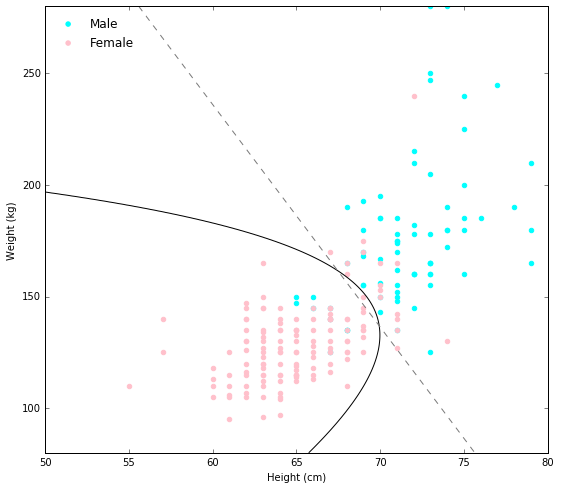

In [22]:
fig = plt.figure(figsize = (9,8))
ax = fig.add_subplot(111)
ax.scatter(data_m[:,0], data_m[:,1], color = 'cyan', label = 'Male')
ax.scatter(data_f[:,0], data_f[:,1], color = 'pink', label = 'Female')
ct = ax.contour(X,Y, Z_m - Z_f, levels = [0], colors = 'k', linewidth = 3., label = 'QDA')
ct = ax.contour(X,Y, Z_lm - Z_lf, levels = [0], colors = (cm.Greys(0.6),), linestyles = ('--',),
                linewidth = 3., label = 'LDA')

ax.set_xlim([50,80])
ax.set_ylim([80,280])
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')

#y_arrow = ct.collections[0].get_paths()[0].vertices[-4]
#ax.arrow(xy_arrow[0], xy_arrow[1], 1, 20, fc='k', ec='k')
#ax.text(xy_arrow[0] + 2, xy_arrow[1] + 2, r'Higher prob. of being male')
#ax.text(xy_arrow[0], xy_arrow[1] - 20, r'Higher prob. of being female')
leg = ax.legend(loc = 'upper left', scatterpoints = 1, frameon = False)